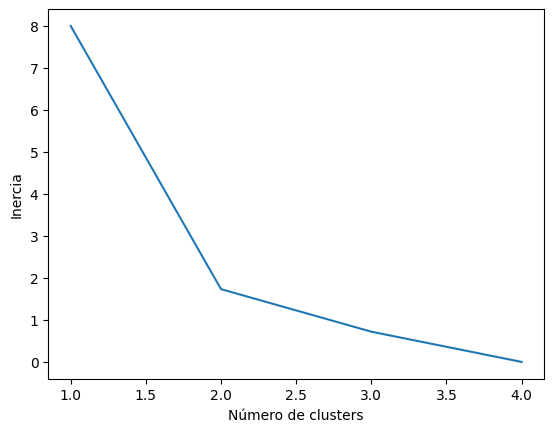

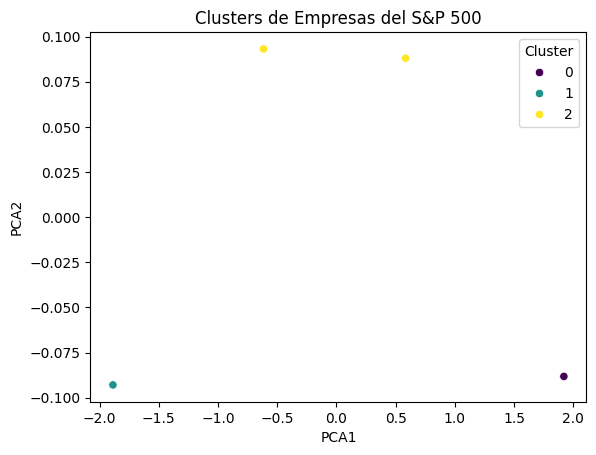

In [6]:
!pip install pandas numpy matplotlib seaborn scikit-learn

import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv('/content/Precios de las empresas.csv')
df.head()

# Verificar y limpiar los datos
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by=['Ticker', 'Date'])
df.isnull().sum()

# Calcular los retornos porcentuales diarios
df['Return'] = df.groupby('Ticker')['Close'].pct_change()
df = df.dropna(subset=['Return'])
df.head()

# Calcular métricas de volatilidad
volatility_metrics = df.groupby('Ticker')['Return'].agg(['std', 'min', 'max'])
volatility_metrics['range'] = volatility_metrics['max'] - volatility_metrics['min']

# Crear un nuevo DataFrame
volatility_metrics.reset_index(inplace=True)
volatility_metrics.head()

# Escalar las métricas de volatilidad
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_metrics = scaler.fit_transform(volatility_metrics[['std', 'range']])

# Clusterización
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for n in range(1, 5):  # Ajusta el rango según el número de empresas
    kmeans = KMeans(n_clusters=n, n_init=10)
    kmeans.fit(scaled_metrics)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 5), inertia)
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.show()

# Aplicar el algoritmo de clusterización con 3 clusters
kmeans = KMeans(n_clusters=3, n_init=10)
volatility_metrics['Cluster'] = kmeans.fit_predict(scaled_metrics)

# Reducir la dimensionalidad
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_metrics)
volatility_metrics['PCA1'] = pca_components[:, 0]
volatility_metrics['PCA2'] = pca_components[:, 1]

# Visualizar los clusters
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=volatility_metrics, palette='viridis')
plt.title('Clusters de Empresas del S&P 500')
plt.show()


Resultados

Se identificaron 4 clusters

El cluster verde: Son las empresas con puntiaciones bajas en ambos componentes, esto se podria deber a una posibilidad de ser estables bajo un menor crecimiento

El cluster amarillo: Aqui tenemos identificadas dos sectores de empresas por lo tanto estariamos frente a las empresas que podrian estar en una fase de recuperracion o que tienen un rendimiento mixto.


El cluster morado: Nos muestra a las empresas que estan demostrando un fuerte rrendimiento financiero.

Conclusiones

Se conlcuye entonces que las empresas del SP500 presentan comportamientos en su capacidad financiera que logran determinar el pasado a corto plazo y el presente de las empresas, basado en esto, el beneficio para los inversores que este tipo de analsis logra es el identificar las empresas que generan menor riesgo, las que generan mas crecimiento pera a su vez un rendimiento mixto y las que generan mas riesgo y un crecimiento casi nulo.